In [1]:
import ast
import pathlib
import re

import pandas as pd

FANMOD_path = "C:\\Users\\User\\source\\repos\\fanmod-cmd\\out\\build\\x64-release"
FANMOD_exe = "LocalFANMOD.exe"

fov_folder = 'C:\\Users\\User\\Documents\\studies\\phd\\weizmann_2023\\melanoma'


In [5]:
import os
import re

## Build the graph for CISM analysis

In [6]:
cells_mapper = {
  1: 'Unidentified',
  2: 'Endothelial',
  3: 'Mesenchyme',
  4: 'Tumor',
  5: 'Tregs',
  6: 'CD4 t cells',
  7: 'CD8 T cells',
  8: 'CD3 T cells',
  9: 'NK cells',
  10: 'B cells',
  11: 'Neutrophils',
  12: 'Macrophages',
  13: 'DC',
  14: 'DC/Mono',
  15: 'Mono/Neu',
  16: 'Immune other'
}

In [7]:
len(set(cells_mapper.values()))

16

In [3]:
len(cells_mapper)

16

In [4]:
from cism.graph.create_formatted_graph import GraphBuilder
import pandas as pd

raw_csv_file = r"C:\Users\User\Documents\studies\phd\Spatial Omics Datasets\TNBC-MIBITOF\MIBI-TOF_TNBC.csv"

raw_df = pd.read_csv(filepath_or_buffer=raw_csv_file, index_col=0)

In [7]:
raw_df.rename({'cell type': 'pred', 'SampleID':'patient number', 'cellLabelInImage': 'cell_id'}, axis=1).to_csv(r"C:\Users\User\Documents\studies\phd\Spatial Omics Datasets\TNBC-MIBITOF\MIBI-TOF_TNBC_viewer.csv")

In [4]:
raw_df.SampleID.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40], dtype=int64)

In [5]:
raw_df.columns

Index(['SampleID', 'cellLabelInImage', 'cellSize', 'dsDNA', 'Vimentin', 'SMA',
       'FoxP3', 'Lag3', 'CD4', 'CD16', 'CD56', 'PD1', 'CD31', 'PD-L1', 'EGFR',
       'Ki67', 'CD209', 'CD11c', 'CD138', 'CD68', 'CD8', 'CD3', 'IDO',
       'Keratin17', 'CD63', 'CD45RO', 'CD20', 'p53', 'Beta catenin', 'HLA-DR',
       'CD11b', 'CD45', 'H3K9ac', 'Pan-Keratin', 'H3K27me3', 'phospho-S6',
       'MPO', 'Keratin6', 'HLA_Class_1', 'cell type', 'label', 'centroid-0',
       'centroid-1', 'area', 'eccentricity', 'major_axis_length',
       'minor_axis_length', 'perimeter', 'equivalent_diameter_area',
       'euler_number', 'extent', 'feret_diameter_max', 'orientation',
       'perimeter_crofton', 'solidity', 'CellType'],
      dtype='object')

In [15]:
raw_df= raw_df.rename({'cell type': 'pred', 'SampleID': 'fov', 'cellLabelInImage': 'cell_id'}, axis=1).loc[:, ['fov', 'cell_id', 'centroid-0', 'centroid-1', 'pred']]

raw_df['patient_id'] = raw_df['fov']
raw_df.loc[raw_df['patient_id'] == 22, 'patient_id'] = 15 # patient 15 is the same as patient 22

raw_df[['patient_id', 'fov', 'cell_id', 'centroid-0', 'centroid-1', 'pred']].to_csv('../analysis/Tutorial/mibitof_tnbc_pred_cell_type.csv')

In [3]:
raw_df['fov'] = raw_df['SampleID']

In [4]:
raw_df.loc[raw_df['SampleID'] == 22, 'SampleID']= 15 # patient 15 is the same as patient 22

In [33]:
colnames_mapper_dict = {'cell_types' : 'cell type', 'patient_id' : 'SampleID'}

g = GraphBuilder(raw_df, cells_mapper, colnames_mapper_dict)

g.build_graph(path_to_output_dir='./TNBC_MIBITOF/', max_distance=100)

{'B cells': 0, 'CD3 T cells': 1, 'CD4 t cells': 2, 'CD8 T cells': 3, 'DC': 4, 'DC/Mono': 5, 'Endothelial': 6, 'Immune other': 7, 'Macrophages': 8, 'Mesenchyme': 9, 'Mono/Neu': 10, 'NK cells': 11, 'Neutrophils': 12, 'Tregs': 13, 'Tumor': 14, 'Unidentified': 15}


In [5]:
labels_csv_file = r"C:\Users\User\Documents\studies\phd\datasets\MIBI-TOF_TNBC\mmc2.csv"
labels_raw_df = pd.read_csv(filepath_or_buffer=labels_csv_file)
labels_raw_df

,InternalId,DONOR_NO,YEAR,ANON_ID_ONCOSHARE,AGE_AT_DX,YEARDX,STAGE,SITE_02,LATERAL,GRADE,...,RESULT_GENE_2,RESULT_MUTATION_2,TEST_OFFERING_2,MYRIAD_TEST_RESULT,RECURRENCE_LABEL,TIL_score,Survival_days_capped*,Censored,Unnamed: 29,Unnamed: 30
0,1,30824,2008,9837,77,2008,33,C504,2,1,...,NaN,NaN,NaN,NaN,POSITIVE,NaN,2612,0,NaN,NaN
1,2,30805,2007,8254,67,2007,32,C509,2,3,...,NaN,NaN,NaN,NaN,NEGATIVE,1.5,745,0,NaN,NaN
2,3,30812,2007,12997,42,2007,21,C509,2,3,...,0.0,0.0,0.0,NO MUTATION DETECTED,NEGATIVE,NaN,3130,1,NaN,NaN
3,4,30838,2009,10689,41,2009,22,C505,2,3,...,0.0,0.0,0.0,NO MUTATION DETECTED,POSITIVE,3.0,2523,1,NaN,NaN
4,5,30865,2011,13917,64,2011,11,C508,1,3,...,NaN,NaN,NaN,NaN,NEGATIVE,3.0,1683,1,NaN,NaN
5,6,30847,2009,10798,53,2009,10,C508,1,3,...,NaN,NaN,NaN,NaN,NEGATIVE,2.5,2275,1,NaN,NaN
6,7,30854,2010,6227,62,2009,32,C509,2,2,...,NaN,NaN,NaN,NaN,POSITIVE,NaN,584,0,NaN,NaN
7,8,30846,2009,878,26,2009,21,C503,1,3,...,0.0,0.0,0.0,POSITIVE FOR A DELETERIOUS MUTATION,POSITIVE,1.0,946,0,NaN,NaN
8,9,30783,2005,1188,79,2005,21,C504,2,3,...,NaN,NaN,NaN,NaN,NEGATIVE,3.0,3767,1,NaN,NaN
9,10,30781,2005,13763,60,2005,22,C502,2,3,...,NaN,NaN,NaN,NaN,NEGATIVE,3.5,3822,1,NaN,NaN


In [6]:
raw_df = pd.merge(raw_df, labels_raw_df, left_on='SampleID', right_on='InternalId')
raw_df.columns

Index(['Unnamed: 0', 'SampleID', 'cellLabelInImage', 'cellSize', 'dsDNA',
       'Vimentin', 'SMA', 'FoxP3', 'Lag3', 'CD4', 'CD16', 'CD56', 'PD1',
       'CD31', 'PD-L1', 'EGFR', 'Ki67', 'CD209', 'CD11c', 'CD138', 'CD68',
       'CD8', 'CD3', 'IDO', 'Keratin17', 'CD63', 'CD45RO', 'CD20', 'p53',
       'Beta catenin', 'HLA-DR', 'CD11b', 'CD45', 'H3K9ac', 'Pan-Keratin',
       'H3K27me3', 'phospho-S6', 'MPO', 'Keratin6', 'HLA_Class_1', 'cell type',
       'label', 'centroid-0', 'centroid-1', 'area', 'eccentricity',
       'major_axis_length', 'minor_axis_length', 'perimeter',
       'equivalent_diameter_area', 'euler_number', 'extent',
       'feret_diameter_max', 'orientation', 'perimeter_crofton', 'solidity',
       'CellType', 'fov', 'InternalId', 'DONOR_NO', 'YEAR',
       'ANON_ID_ONCOSHARE', 'AGE_AT_DX', 'YEARDX', 'STAGE', 'SITE_02',
       'LATERAL', 'GRADE', 'TCODE_P', 'NCODE_P', 'MCODE_P', 'AJCC_P', 'ER',
       'PR', 'HER2NEU', 'CS_TUM_SIZE', 'RESULT_GENE_1', 'RESULT_MUTATION_1

In [9]:
raw_df['Patient_uId'] = 'TNBC' + raw_df['SampleID'].astype('str')

raw_df.groupby(['Patient_uId']).first()['Survival_days_capped*'].to_csv('./TNBC_MIBITOF/patient_class_survival_days.csv', header=False)

In [55]:
cells_type_opposite = {'B cells': 0, 'CD3 T cells': 1, 'CD4 t cells': 2, 'CD8 T cells': 3, 'DC': 4, 'DC/Mono': 5, 'Endothelial': 6, 'Immune other': 7, 'Macrophages': 8, 'Mesenchyme': 9, 'Mono/Neu': 10, 'NK cells': 11, 'Neutrophils': 12, 'Tregs': 13, 'Tumor': 14, 'Unidentified': 15}

cells_type = {v:k for k, v in cells_type_opposite.items()}
cells_type

{0: 'B cells',
 1: 'CD3 T cells',
 2: 'CD4 t cells',
 3: 'CD8 T cells',
 4: 'DC',
 5: 'DC/Mono',
 6: 'Endothelial',
 7: 'Immune other',
 8: 'Macrophages',
 9: 'Mesenchyme',
 10: 'Mono/Neu',
 11: 'NK cells',
 12: 'Neutrophils',
 13: 'Tregs',
 14: 'Tumor',
 15: 'Unidentified'}

## Build the graph data based on cells type

In [10]:
import pandas as pd

raw_csv_file = "C:\\Users\\User\\Documents\\studies\\phd\\weizmann_2023\\melanoma\\30.09.2023\\cleaned_expression_with_both_classification_prob_spatial_27_09_23.csv"

raw_df = pd.read_csv(filepath_or_buffer=raw_csv_file, index_col=0)

In [18]:
raw_df['Patient_uId'] = 'Melanoma' + raw_df['patient number'].astype('str')

In [27]:
raw_df.groupby(['Patient_uId']).first()['Group'].to_csv(r'C:\Users\User\Documents\dev\TNBC_motif\data\melanoma\patient_class.csv', header=False)

In [12]:
raw_df.columns

Index(['cell_size', '128Te', '129Xe', '12C', '130Xe', '131Xe', '132Xe',
       '137Ba', '138Ba', '139La', '140Ce', '181Ta', '182Empty', '197Au',
       '23Na', '24Mg', '25Mg', '27Al', '28Si', '31P', '32Si', '39K', '40Ca',
       '41K', '56Fe', '64Zn', '66Zn', 'Alexa Fluor 488', 'Bax', 'CCR7',
       'CD11c', 'CD14', 'CD163', 'CD20', 'CD206', 'CD21', 'CD3', 'CD31', 'CD4',
       'CD45', 'CD45RA', 'CD45RO', 'CD56', 'CD68', 'CD69', 'CD8', 'COL1A1',
       'DC-SIGN', 'Foxp3', 'Granzyme B', 'HLA-DR-DP-DQ', 'HLA-class-1-A-B-C',
       'IDO-1', 'Ki67', 'LAG-3', 'MECA-79', 'MelanA', 'PD-1',
       'S100A9-Calprotectin', 'SMA', 'SOX10', 'TCF1TCF7', 'TIM-3', 'Tox-Tox2',
       'anti-Biotin', 'dsDNA', 'label', 'area', 'eccentricity',
       'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area',
       'equivalent_diameter', 'centroid-0', 'centroid-1',
       'major_minor_axis_ratio', 'perim_square_over_area',
       'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif'

c:\users\user\documents\dev\tnbc_motif\venv\lib\site-packages\libpysal\cg\voronoi.py:173: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  region_df["geometry"] = [Polygon(vertices[region]) for region in regions]
c:\users\user\documents\dev\tnbc_motif\venv\lib\site-packages\libpysal\cg\voronoi.py:176: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoData

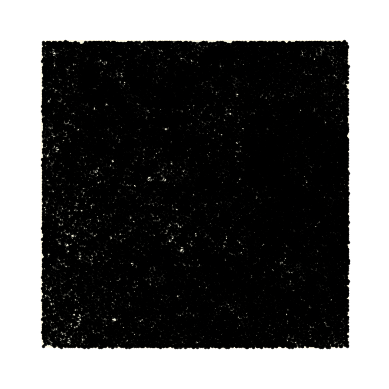

In [6]:
import networkx as nx
import numpy as np
from libpysal.cg import voronoi_frames
from libpysal import weights, examples
import matplotlib.pyplot as plt

for patient_id in raw_df['patient number']:
    graph = nx.Graph()
    patient_data = raw_df[raw_df['patient number'] == patient_id]
    coordinates = np.column_stack((patient_data['centroid-0'], patient_data['centroid-1']))
    cells, generators = voronoi_frames(coordinates, clip="convex hull")
    delaunay = weights.Rook.from_dataframe(cells)
    delaunay_graph = delaunay.to_networkx()
    positions = dict(zip(delaunay_graph.nodes, coordinates))
    ax = cells.plot(facecolor="lightblue", alpha=0.50, edgecolor="cornsilk", linewidth=2)
    ax.axis("off")
    nx.draw(
        delaunay_graph,
        positions,
        ax=ax,
        node_size=2,
        node_color="k",
        edge_color="k",
        alpha=0.8,
    )
    plt.show()
    break
    #for idx, row in patient_data.iterrows():


In [6]:
import os
from pathlib import Path

data = pd.DataFrame(columns=['old_filename', 'new_filename'])

base_dir = r"C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance"
for filename in os.listdir(base_dir):
    if Path(base_dir+'\\'+filename).is_dir():
        continue
    _, patient, patient_num, fov_key, fov_num, file_type = re.split("[_ .]", filename)
    old_filename = base_dir + "\\" + filename
    new_filename = base_dir + "\\" + f'{patient}_{patient_num}_{fov_num}.{file_type}'
    print(new_filename)
    if not Path(new_filename).is_file():
        data = pd.concat([data, pd.DataFrame({'old_filename': old_filename,
                                              'new_filename': new_filename}, index=[0])], ignore_index=True)
        os.rename(old_filename, new_filename)

data.to_csv('./with_100_distance/rename_log.csv')

C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_100_FOV302.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_100_FOV306.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_100_FOV308.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_102_FOV84.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_102_FOV86.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_102_FOV88.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_102_FOV90.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_102_FOV92.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_103_FOV94.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_104_FOV102.txt
C:\Users\User\Documents\dev\TNBC_motif\auxiliary\with_100_distance\Patient_104_FOV104.txt
C:\Users\User\Do